# Word2Vec Using Tensorflow with Korean News Article Titles


#### Kisoo Kim, 07/23/2018



The news articles for this notebook are parts of the articles published online from 07/20/2018 to 07/23/2018.

This overall structure of the code below follows an example by Minsuk Heo, available at https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/nlp/word2vec_tensorflow.ipynb

In [122]:
# Load File
lines = []
f = open('cqrs_short.txt','rt', encoding='utf-8')  # Open file with 'UTF-8' 인코딩
while True:
    line = f.readline()
    lines.append(line)
    if not line:
        break
f.close()

lines = lines[90:100]

# Extract corpus from a sentence
from konlpy.tag import Kkma
from konlpy.utils import pprint

def extract_corpus(sentence):
    kkma = Kkma()
    result = []
    corpus = kkma.pos(sentence)
    for each in corpus:
        pos = each[1][0]
        if(pos == "N"):
        #if(pos == "N" or pos == "V" or pos == "M"):
            result.append(each[0])
    return result

# Remove Characters
titles = []
remove_characters = ['\\n', "\n", '\'', '"', "'", '’', '‘']
for title in lines:
    for remove_character in remove_characters:
        title = title.replace(remove_character,"")
    titles.append(title)


# Array of Corpus List for Each Sentence
corpus = []
    
for title in titles:
    corpus.append(extract_corpus(title))

In [123]:
print(len(corpus))

10


In [124]:
print(corpus)

[['교사', '이불', '어린이', '집', '원생'], ['금요일', '별자리', '운세', '7', '월', '20', '일', '위험', '신호', '동영상', '오늘', '운세'], ['영국', '헤어', '브러쉬', '글', '티', '저', '홈', '쇼핑', '2', '차', '방송', '진행'], ['홈', '초이스', '여름', '방학', '맞이', '인기', '작', '이벤트', '실시'], ['134', '4', '연', '승', '도전', '쇼', '군', '라', '스미스', '대결'], ['강서구', '11', '개월', '아이', '보육', '교사', '구속', '영장', '청구'], ['21', '세기', '마', '하리', '20', '대', '러시아', '스파이', '워싱턴'], ['구', '글', '과징금', '부과', '트럼프', '미국', '이용', '것', '것'], ['종합', '투', '3', '이소라', '김', '민', '김', '민경', '언니', '입담'], ['전주시', '행', '안부', '재난', '대응', '평가서', '최우수', '선정']]


In [125]:
words = []
for text in corpus:
    for word in text:
        words.append(word)

words = set(words)

In [126]:
print(len(words))

86


In [127]:
print(words)

{'저', '마', '금요일', '7', '차', '일', '집', '티', '21', '20', '종합', '스파이', '신호', '134', '청구', '부과', '워싱턴', '오늘', '미국', '초이스', '대결', '평가서', '3', '브러쉬', '여름', '작', '11', '홈', '투', '이용', '진행', '이소라', '쇼핑', '연', '스미스', '세기', '대응', '쇼', '원생', '교사', '러시아', '개월', '방학', '민경', '도전', '대', '실시', '별자리', '승', '행', '맞이', '민', '강서구', '김', '입담', '것', '동영상', '인기', '트럼프', '언니', '재난', '운세', '구속', '구', '라', '헤어', '글', '최우수', '이벤트', '2', '어린이', '전주시', '영장', '아이', '과징금', '안부', '선정', '4', '보육', '하리', '월', '이불', '방송', '위험', '영국', '군'}


In [128]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence)
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [129]:
import pandas as pd
df = pd.DataFrame(data, columns = ['input', 'label'])

In [130]:
df.head(10)

,input,label
0,교사,이불
1,교사,어린이
2,이불,교사
3,이불,어린이
4,이불,집
5,어린이,교사
6,어린이,이불
7,어린이,집
8,어린이,원생
9,집,이불


In [131]:
df.shape

(308, 2)

In [132]:
word2int

{'11': 26,
 '134': 13,
 '2': 69,
 '20': 9,
 '21': 8,
 '3': 22,
 '4': 77,
 '7': 3,
 '강서구': 52,
 '개월': 41,
 '것': 55,
 '과징금': 74,
 '교사': 39,
 '구': 63,
 '구속': 62,
 '군': 85,
 '글': 66,
 '금요일': 2,
 '김': 53,
 '대': 45,
 '대결': 20,
 '대응': 36,
 '도전': 44,
 '동영상': 56,
 '라': 64,
 '러시아': 40,
 '마': 1,
 '맞이': 50,
 '미국': 18,
 '민': 51,
 '민경': 43,
 '방송': 82,
 '방학': 42,
 '별자리': 47,
 '보육': 78,
 '부과': 15,
 '브러쉬': 23,
 '선정': 76,
 '세기': 35,
 '쇼': 37,
 '쇼핑': 32,
 '스미스': 34,
 '스파이': 11,
 '승': 48,
 '신호': 12,
 '실시': 46,
 '아이': 73,
 '안부': 75,
 '어린이': 70,
 '언니': 59,
 '여름': 24,
 '연': 33,
 '영국': 84,
 '영장': 72,
 '오늘': 17,
 '운세': 61,
 '워싱턴': 16,
 '원생': 38,
 '월': 80,
 '위험': 83,
 '이벤트': 68,
 '이불': 81,
 '이소라': 31,
 '이용': 29,
 '인기': 57,
 '일': 5,
 '입담': 54,
 '작': 25,
 '재난': 60,
 '저': 0,
 '전주시': 71,
 '종합': 10,
 '진행': 30,
 '집': 6,
 '차': 4,
 '청구': 14,
 '초이스': 19,
 '최우수': 67,
 '투': 28,
 '트럼프': 58,
 '티': 7,
 '평가서': 21,
 '하리': 79,
 '행': 49,
 '헤어': 65,
 '홈': 27}

In [133]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(1).minimize(loss)

In [134]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 2000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 10 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))


iteration 0 loss is :  5.841277
iteration 10 loss is :  4.854289
iteration 20 loss is :  4.6562743
iteration 30 loss is :  4.5210266
iteration 40 loss is :  4.4216027
iteration 50 loss is :  4.34408
iteration 60 loss is :  4.280589
iteration 70 loss is :  4.2264347
iteration 80 loss is :  4.1786914
iteration 90 loss is :  4.135455
iteration 100 loss is :  4.095434
iteration 110 loss is :  4.0577316
iteration 120 loss is :  4.0217175
iteration 130 loss is :  3.9869523
iteration 140 loss is :  3.9531353
iteration 150 loss is :  3.9200673
iteration 160 loss is :  3.887618
iteration 170 loss is :  3.8557112
iteration 180 loss is :  3.8243012
iteration 190 loss is :  3.7933674
iteration 200 loss is :  3.7628977
iteration 210 loss is :  3.7328844
iteration 220 loss is :  3.7033165
iteration 230 loss is :  3.6741774
iteration 240 loss is :  3.6454468
iteration 250 loss is :  3.6170988
iteration 260 loss is :  3.5891054
iteration 270 loss is :  3.5614414
iteration 280 loss is :  3.534087
itera

In [135]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-0.6951112  -1.7115264 ]
 [ 4.642718   -1.2812529 ]
 [ 3.3340826   1.2081963 ]
 [ 4.589224    0.71826845]
 [ 1.0695441  -4.0243297 ]
 [ 3.7986712   0.5387843 ]
 [ 3.0156674   3.023853  ]
 [-1.4471294  -2.22852   ]
 [ 3.5362957  -1.1687651 ]
 [ 2.8647668  -0.22222745]
 [-2.846453    0.7224957 ]
 [ 1.8754635  -0.7620594 ]
 [ 2.9337769   0.9799787 ]
 [-0.65780956  2.9675627 ]
 [ 1.420271    2.7201335 ]
 [-4.4471     -1.8183209 ]
 [ 1.8112339  -0.7400709 ]
 [ 3.7228491   1.5480348 ]
 [-4.5469475  -0.87451094]
 [-0.5493341  -4.868546  ]
 [-2.5027814   2.9779274 ]
 [ 2.5982952  -2.9005945 ]
 [-3.0677915   0.9307071 ]
 [-2.4926207  -2.273987  ]
 [-0.66699606 -4.450052  ]
 [-1.7999626  -3.8979142 ]
 [ 0.6157452   4.652407  ]
 [-0.33126384 -2.2082574 ]
 [-2.6477253   0.7333851 ]
 [-4.431962   -0.67007285]
 [ 1.2377039  -4.0036445 ]
 [-4.078205    1.3192974 ]
 [ 0.12186415 -3.1393135 ]
 [-0.92401224  3.5519156 ]
 [-2.5435507   3.1607397 ]
 [ 3.6869023  -1.2241197 ]
 [ 3.1966004  -3.6177092 ]
 

In [136]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,저,-0.695111,-1.711526
1,마,4.642718,-1.281253
2,금요일,3.334083,1.208196
3,7,4.589224,0.718268
4,차,1.069544,-4.024330
5,일,3.798671,0.538784
6,집,3.015667,3.023853
7,티,-1.447129,-2.228520
8,21,3.536296,-1.168765
9,20,2.864767,-0.222227


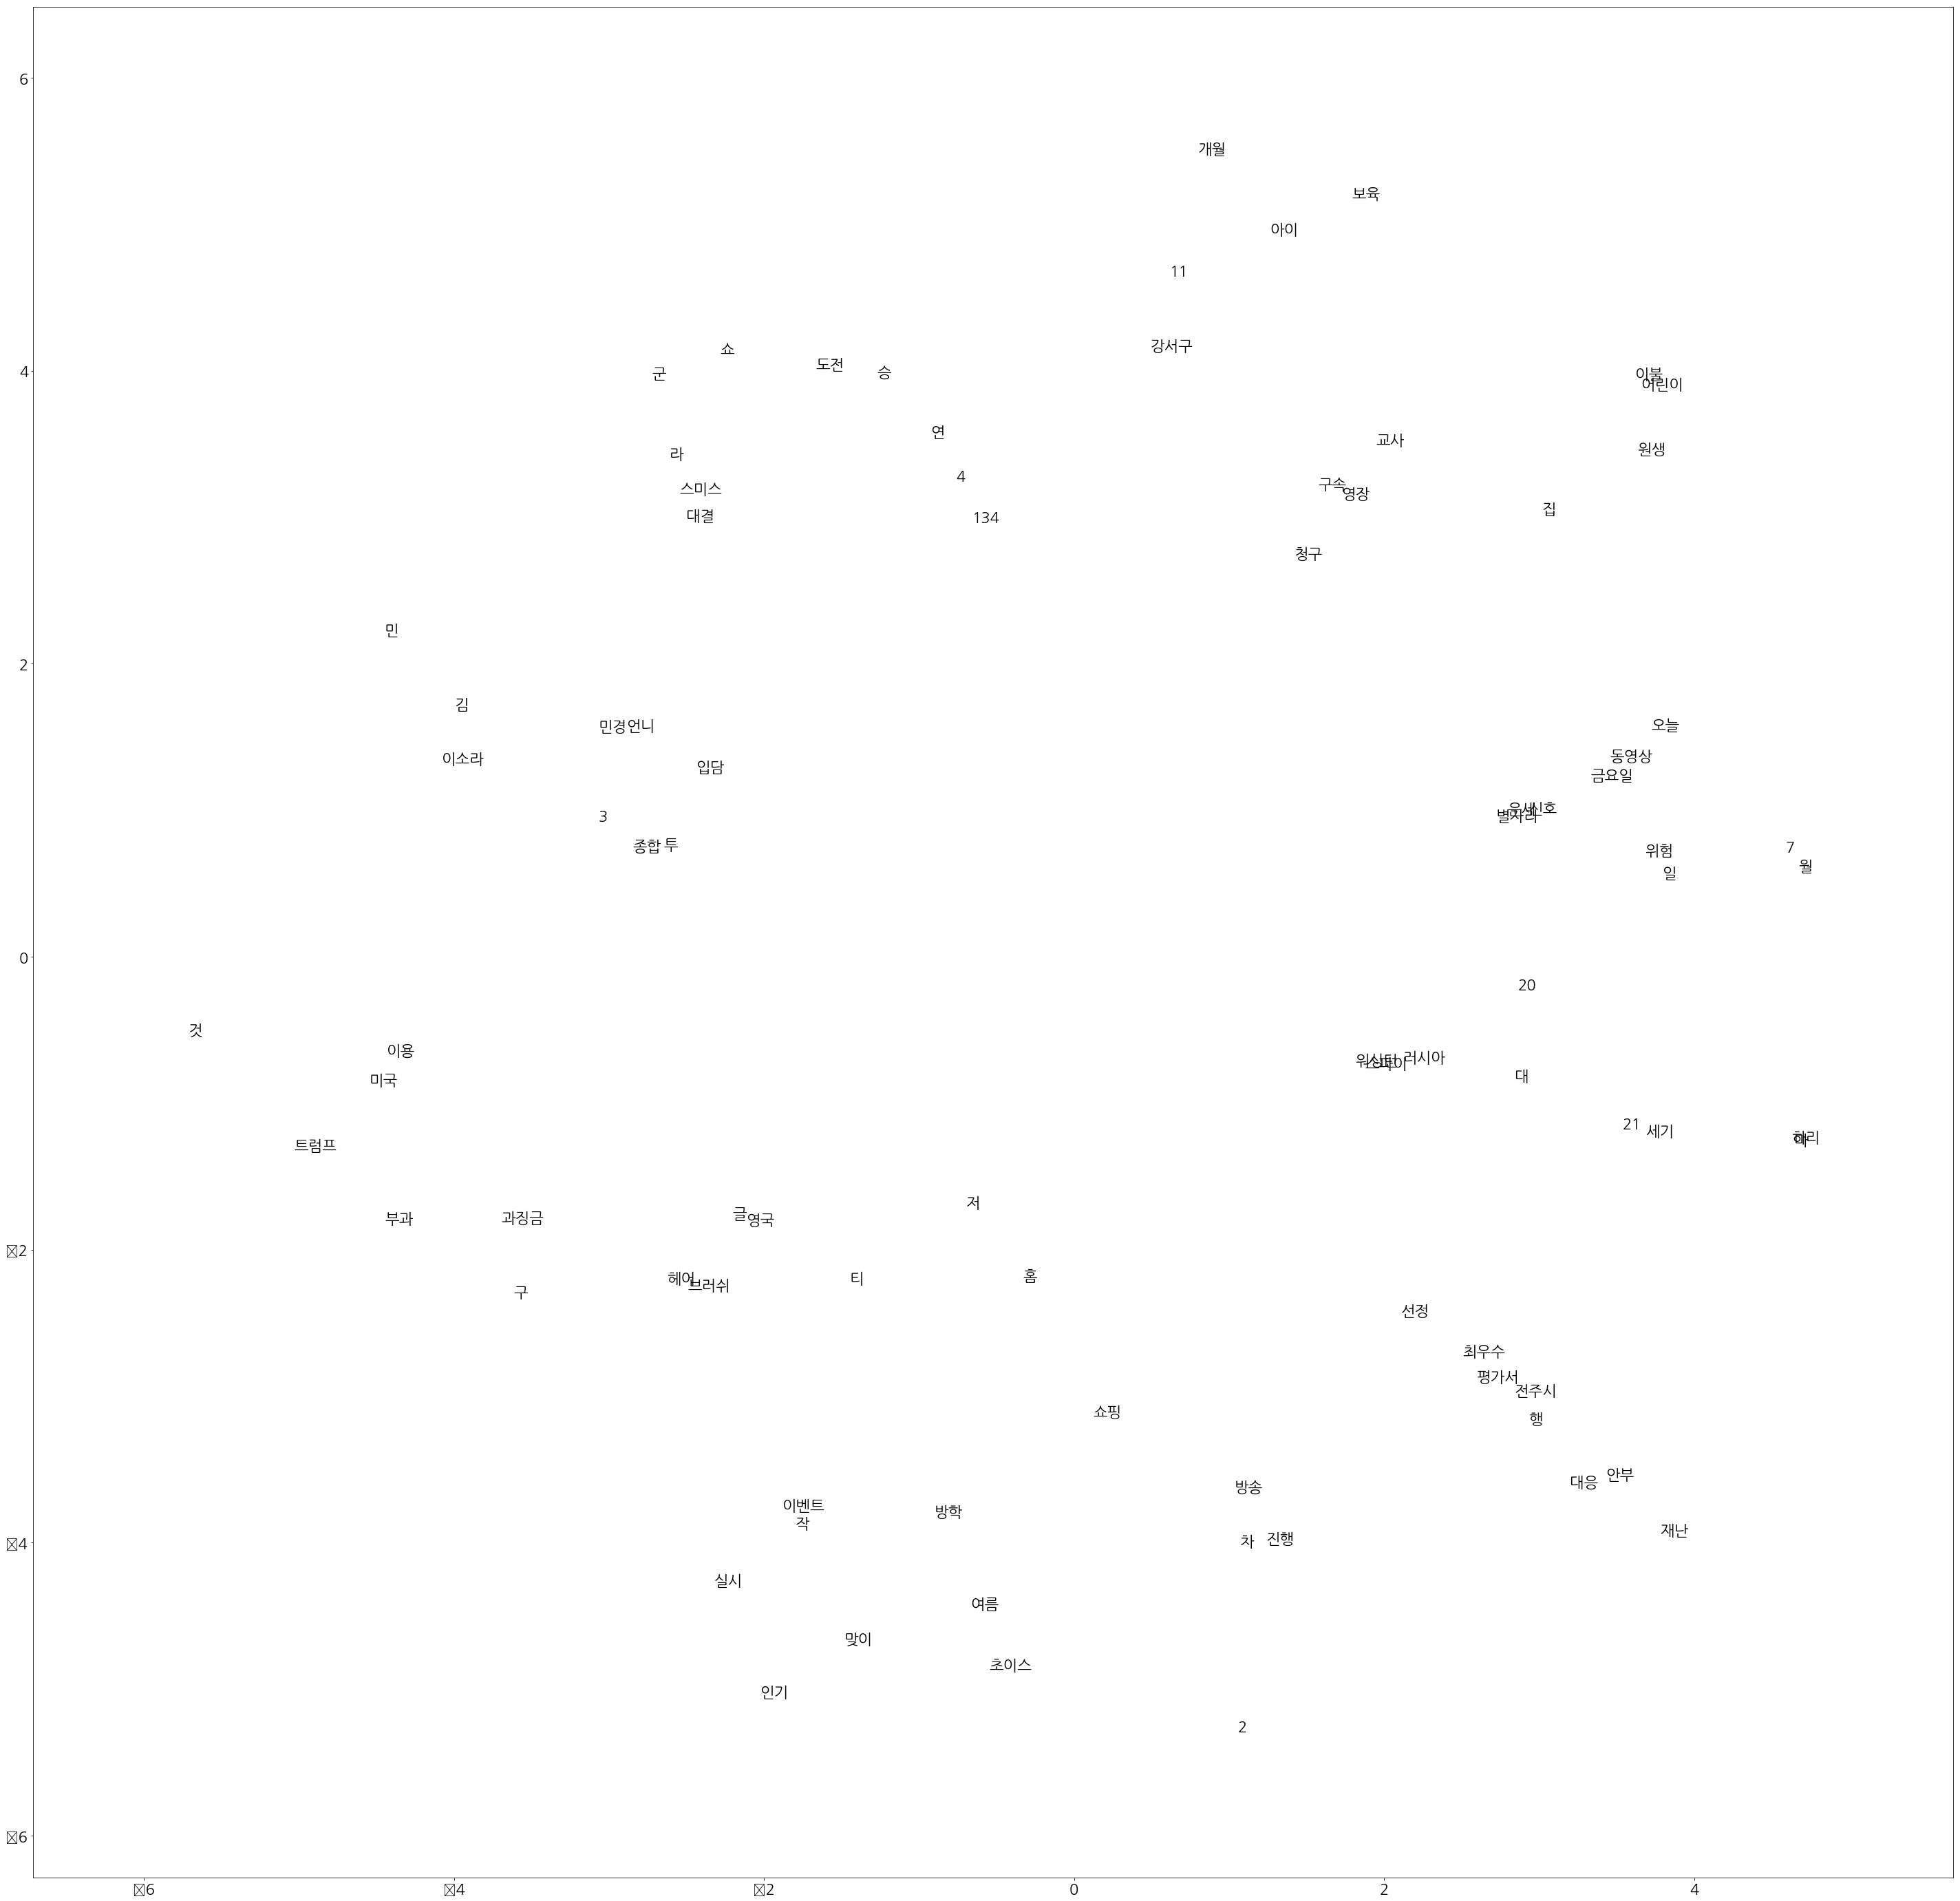

In [137]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_location = 'nanumgothic.ttf'  
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name, size=22)

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (50,50)

plt.show()